## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Prediction with random weights & biases (2 inputs, 3 outputs)
This is not machine learning yet, just a demonstration of the basic calculation of neural network.

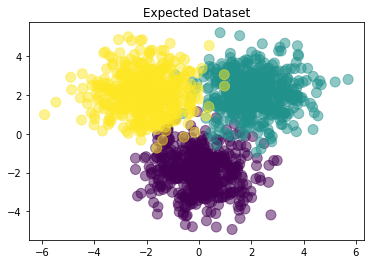

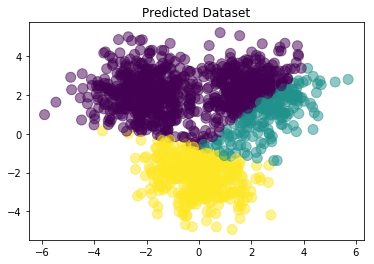

Classification rate for randomly chosen weights: 0.126
Prediction overview:  Counter({0: 865, 2: 446, 1: 189})


In [4]:
# Define number of records
N = 500

# Create 3 sets of standard normal data with translation
X1 = np.random.randn(N, 2) + np.array([0, -2])
X2 = np.random.randn(N, 2) + np.array([2, 2])
X3 = np.random.randn(N, 2) + np.array([-2, 2])

# Create input dataset X
# Dimension = (3N, 2)
X = np.vstack([X1, X2, X3])

# Create output dataset Y with 3 classes
# Dimension = (1, 3N)
Y = np.array([0]*N + [1]*N + [2]*N)

# Create scatterplot of expected dataset
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.title('Expected Dataset')
plt.show()

# Randomly initialize weights and biases
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

# Softmax function
def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

# Determine the classification rate
def classification_rate(Y, P):
    return np.mean(P == Y)

# Prediction based on max probablity among all classes
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

# Verify dimensional calculation is correct 
assert(len(P) == len(Y))

# Create scatterplot of predicted dataset
plt.scatter(X[:,0], X[:,1], c=P, s=100, alpha=0.5)
plt.title('Predicted Dataset')
plt.show()

print("Classification rate for randomly chosen weights:", classification_rate(Y, P))
print("Prediction overview: ", Counter(P))